**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy import optimize

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [95]:
# write your code here

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [96]:
# write your code here


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [97]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [98]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [99]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [100]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [101]:
from scipy.optimize import minimize_scalar

# First we define the profit function
def profit_fun(l, k, n, w):
    p = k * l ** (-n)
    return p * l - w * l # Indirectly, we are plugging in the price function in the profit function

# Secondly, we are setting the maximization
def maximize_profit(k, n, w):
    objective = lambda l: -profit_fun(l, k, n, w)
    result = minimize_scalar(objective, method='bounded', bounds=(0, 1000))
    opt_l = result.x
    opt_profit = -result.fun
    return opt_l, opt_profit

# Parameters. Remember we have already defined the eta and w values. we have a k in a range from 1 to 2
n = 0.5
w = 1.0
k_values = [1.0 + 1 * i for i in range(2)]

for k in k_values:
    opt_l, opt_profit = maximize_profit(k, n, w)
    print(f"For k = {k:.1f}:")
    print(f"The optimal value of l is: {opt_l:.12f}")
    print(f"With a maximum profit of: {opt_profit:.12f}")
    print()

For k = 1.0:
The optimal value of l is: 0.249999957869
With a maximum profit of: 0.250000000000

For k = 2.0:
The optimal value of l is: 0.999998792615
With a maximum profit of: 1.000000000000



We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [102]:
from scipy.stats import norm

# First of all, we could set the parameters
rho = 0.90
iota = 0.01
sigma = 0.10
R = (1 + 0.01) ** (1/12)
n = 0.5
k_ini = 1
w = 1.0
K = 10000  # Number of Shocks we want. We denoted as "S" but actually it's S=K in the model. We did that to avoid confusions. Note: Less make faster the estimation but many make it more aquarate

# Here, we are coding to obtain the random walk
def h_fun(epsilon_series):
    l_ini = 0  # Initial value of l
    h = 0  # Accumulator for h

    for t in range(119): # Remember that we have to set in 119 since the zero is accounted as a first observation
        k_log = np.exp(rho * np.log(k_ini) + epsilon_series[t])
        l = ((1 - n) * k_log / w) ** (1 / n)
        h += R ** (-t) * (k_log * l ** (1 - n) - w * l - (l != l_ini) * iota)
        l_ini = l

    return h

# Generating the random shock series
np.random.seed(0)
epsilon_series = norm.rvs(loc=-0.5 * sigma**2, scale=sigma, size=(K, 119)) # we use the function norm.rvs to generate the shock series since it's more simple and easier. As you can see, it follows a normal distribution according with the parameters given.

# Finally, we estimate the H value. The reasoning of this part is that we obtained the expected value by averaging the values of h over the shocks
H = np.mean([h_fun(epsilon) for epsilon in epsilon_series])

print(f"Expected value of the salon (H): {H:.6f}")

Expected value of the salon (H): 27.498108


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.




**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [103]:
# To calculate the H with a Delta = 0.05 we have to re-define the function setted to find h. 
# We include the policy using the for-in and if-else tools
def h_fun_delta(epsilon_series, delta):
    l_ini = 0  # Initial value of l
    h = 0  # we set an initial value of h=0 to start the iteration. It is just the initial value
    for t in range(119): # Remember that we have to set in 119 since the zero is accounted as a first observation
        k_log = np.exp(rho * np.log(k_ini) + epsilon_series[t]) # we set as a k_log to avoid confutions for the las k's estimated
        l_star = ((1 - n) * k_log / w) ** (1 / n) # The same case as before
        if t == 0:
            l = l_star
        else:
            if abs(l - l_star) > delta:
                l = l_star
            else:
                l = l_ini
        h += R ** (-t) * (k_log * l ** (1 - n) - w * l - (l != l_ini) * iota)
        l_ini = l
    return h

H_delta = np.mean([h_fun_delta(epsilon, 0.05) for epsilon in epsilon_series])
print(f"Expected value of the salon with delta=0.05 (H_delta): {H_delta:.6f}")

print(f"The new policy implemented improves the profitability in: {((H_delta/H)-1)*100:.6f} %")

Expected value of the salon with delta=0.05 (H_delta): 28.041971
The new policy implemented improves the profitability in: 1.977820 %


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [104]:
# First we make a set of values for Delta. The wider the set, the more accurate the approximation will be.
delta_values = np.arange(0.01, 0.5, 0.01) 
max_H = -np.inf # This line is importante because by being initialized to the lowest value, we ensure that when the maximum value is calculated in the subsequent code, any other value will be greater than this initialized value
max_delta = 0

H_values = [] # This is the dictionary where we are gonna storage the values of H for each delta
for delta in delta_values:
    H_delta = np.mean([h_fun_delta(epsilon, delta) for epsilon in epsilon_series]) # We just use the function created in the last question
    H_values.append(H_delta) # Here, we are saving the outputs
    if H_delta > max_H: 
        max_H = H_delta
        max_delta = delta

print(f"Delta value that maximizes H: {max_delta:.6f}")
print(f"Expected value of the salon with delta={max_delta:.6f} (H_delta): {max_H:.6f}")

Delta value that maximizes H: 0.100000
Expected value of the salon with delta=0.100000 (H_delta): 28.205578


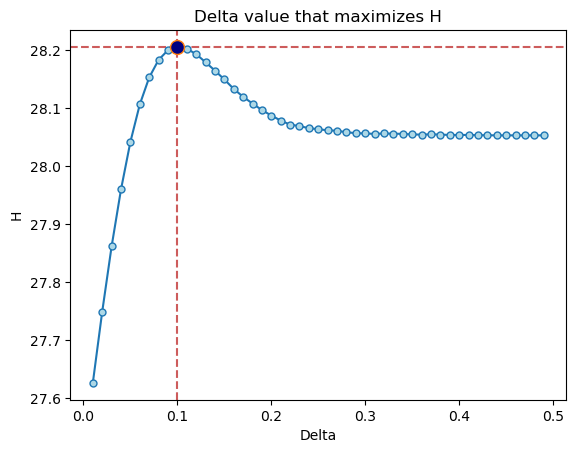

In [105]:
# Here we just make the graph to ilustrate the answer obtained
plt.axvline(x=max_delta, color='indianred', linestyle='--')
plt.axhline(y=max_H, color='indianred', linestyle='--')
plt.plot(delta_values, H_values, marker='o', markersize=5, markerfacecolor='lightblue')
plt.plot(max_delta, max_H, marker='o', markersize=10, markerfacecolor='navy')
plt.xlabel('Delta')
plt.ylabel('H')
plt.title('Delta value that maximizes H')
plt.show()


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In Question 3, the policy states that if the absolute difference between the previous period's labor level and the optimal labor level (given by $\ell_t^*$) is greater than a certain value $\Delta$, then the Salon will adjust its labor level to the optimal level. Otherwise, it will maintain its previous labor level.

Essentially, this is a way to minimize its labor adjustment costs by only adjusting them when it is absolutely necessary. The value of $\Delta$ determines how sensitive the Salon is to changes in its optimal labor level. If $\Delta$ is high, that means the Salon will only adjust its labor level when there are significant changes in its optimal level. However, if $\Delta$ is low or zero, it will adjust its labor level more frequently, which could lead to higher labor adjustment costs.

**Alternative Policy**

An alternative policy could be to decrease the level of uncertainty faced by workers when deciding how much to work. The approach is introducing a long-term contract between the workers and the firm, which guarantees a stable wage rate over a certain period of time. By doing this, workers will be less likely to reduce their labor supply due to fear of wage cuts. It could also be complemented providing workers with training opportunities, which will increase their human capital and bargaining power, thus reducing the level of adjustment costs.

Is this new policy goin to result in a better value of the Salon? Well, we will see..

In [106]:
# First of all, we recall the structure of the funtion used in Question 2, before the policy.
# We use this function to incorporate the new policy
def h_fun_contract(epsilon_series, wage_rate, contract_length):
    l_ini = 0  # Initial value of l
    h = 0  # we set an initial value of h=0 to start the iteration. It is just the initial value
    for t in range(119): # Remember that we have to set in 119 since the zero is accounted as a first observation
        k_log = np.exp(rho * np.log(k_ini) + epsilon_series[t]) # we set as a k_log to avoid confutions for the las k's estimated
        l_star = ((1 - n) * k_log / wage_rate) ** (1 / n) # The same case as before

        # Now, the best part. Incorporate the long-term contract policy
        if t % contract_length == 0: # Here we set the rules for decision. If the contrat is in a monthly scheme, is the same logic as question 2
            l_contract = l_star
        else:
            l_contract = l

        h += R ** (-t) * (k_log * l_contract ** (1 - n) - wage_rate * l_contract - (l_contract != l_ini) * iota)
        l_ini = l_contract
        l = l_star
    return h

# Then we define the lenght of contrats and the hypotetical increment of wage
wage_rate = 1.1 # Asumme an increment of 10%
contract_length = 12 # Asumme contracts for one year, it means 12 months

# Finally, we calculate the expected value of H using the new policy
H_contract = np.mean([h_fun_contract(epsilon, wage_rate, contract_length) for epsilon in epsilon_series])

# Compare the profit improvement with the original policy
print(f"Expected value of the salon with long-term contract policy: {H_contract:.6f}")
print(f"The new policy implemented improves the profitability in: {((H_contract/H)-1)*100:.6f} %, so it's better not to follow it")

Expected value of the salon with long-term contract policy: 24.518044
The new policy implemented improves the profitability in: -10.837342 %, so it's better not to follow it


## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [107]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

10.087072684721528
Local Minimum 1:
Optimized solution: [15.70011274 13.31533291]
Function value: 0.10602304950900465

Local Minimum 2:
Optimized solution: [12.56009009  8.87688885]
Function value: 0.05917817705516015

Local Minimum 3:
Optimized solution: [12.56008993 17.75378389]
Function value: 0.11833664286916479

Local Minimum 4:
Optimized solution: [15.70011562 13.31532845]
Function value: 0.10602304951794139

Local Minimum 5:
Optimized solution: [ 9.42007139 13.31532848]
Function value: 0.06656436227288887



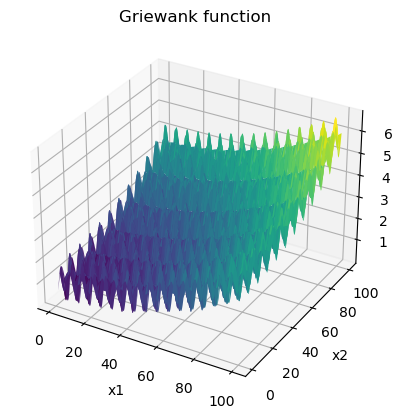

In [109]:
# A. Drawing random x uniformly with k = 100
k = 300
K_bar = 10
lower_bound = 1
upper_bound = 20

for i in range(k):
    x1_random = random.uniform(lower_bound, upper_bound)
    #print(x_random)

for i in range(k):
    x2_random = random.uniform(lower_bound, upper_bound)

# C. calculate qhi
qhi=0.5*(2/1+math.e**((k-K_bar)/100)) # qhi-squared, k=100
print(qhi)

# Define the number of local minima to find
num_minima = 5

# Search for local minima
for i in range(num_minima):
    # Generate a random initial guess and bounds with two variables
    x0 = np.random.uniform(x1_random, x2_random, 2)
    

    # Minimize the Griewank function using the BFGS method
    result = optimize.minimize(griewank, x0, method='BFGS')
    

    # Print the optimized solution and function value
    print(f"Local Minimum {i+1}:")
    print("Optimized solution:", result.x)
    print("Function value:", result.fun)
    print() # With 5 numbers of minima the function value is 0.007396 with x1 = 3.14 and x2 = 4.438.

###Plotting graph to visualize minima
x1_values = np.linspace(1, 100, 999)
x2_values = np.linspace(1, 100, 999)

griewank_1=griewank_(x1_values, x2_values)

X_1, X_2 = np.meshgrid(x1_values, x2_values)

Z= griewank_(X_1, X_2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_1, X_2, Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Griewank Function')
ax.set_title('Griewank function')

plt.show()

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [ ]:
# write your code here